In [5]:
import datetime
import numpy as np
from influxdb import InfluxDBClient

# import plotting related libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from matplotlib import colors
import matplotlib
import matplotlib.patches as mpatches

7.4

In [6]:
# Data Preparation
avg_2hr_err_plot = [0.36743839, 0.24621109, 0.06165547, 0.04113952, 0.06588765]
avg_4hr_err_plot = [0.43007837, 0.32623196, 0.08663453, 0.05752873, 0.04218574]
avg_8hr_err_plot = [0.57808441, 0.47209643, 0.1149862,  0.06347418, 0.05042935]
avg_24hr_err_plot = [0.58515917, 0.60909722, 0.55608618, 0.40550324, 0.29674945]

transaction_avg_12am = [[  2999.33333333,  13057.08333333,  76701, 150857.5,
  302827.08333333],
 [  1745,  7630.16666667,  40598.33333333, 76249.75,
  155634.16666667],
  [7.05500000e+02, 2.72366667e+03, 1.94405833e+04, 3.70848333e+04,
  7.48070000e+04],
 [  162.4,  541.9, 4652.4,  9190.8,
  18622.2 ]]

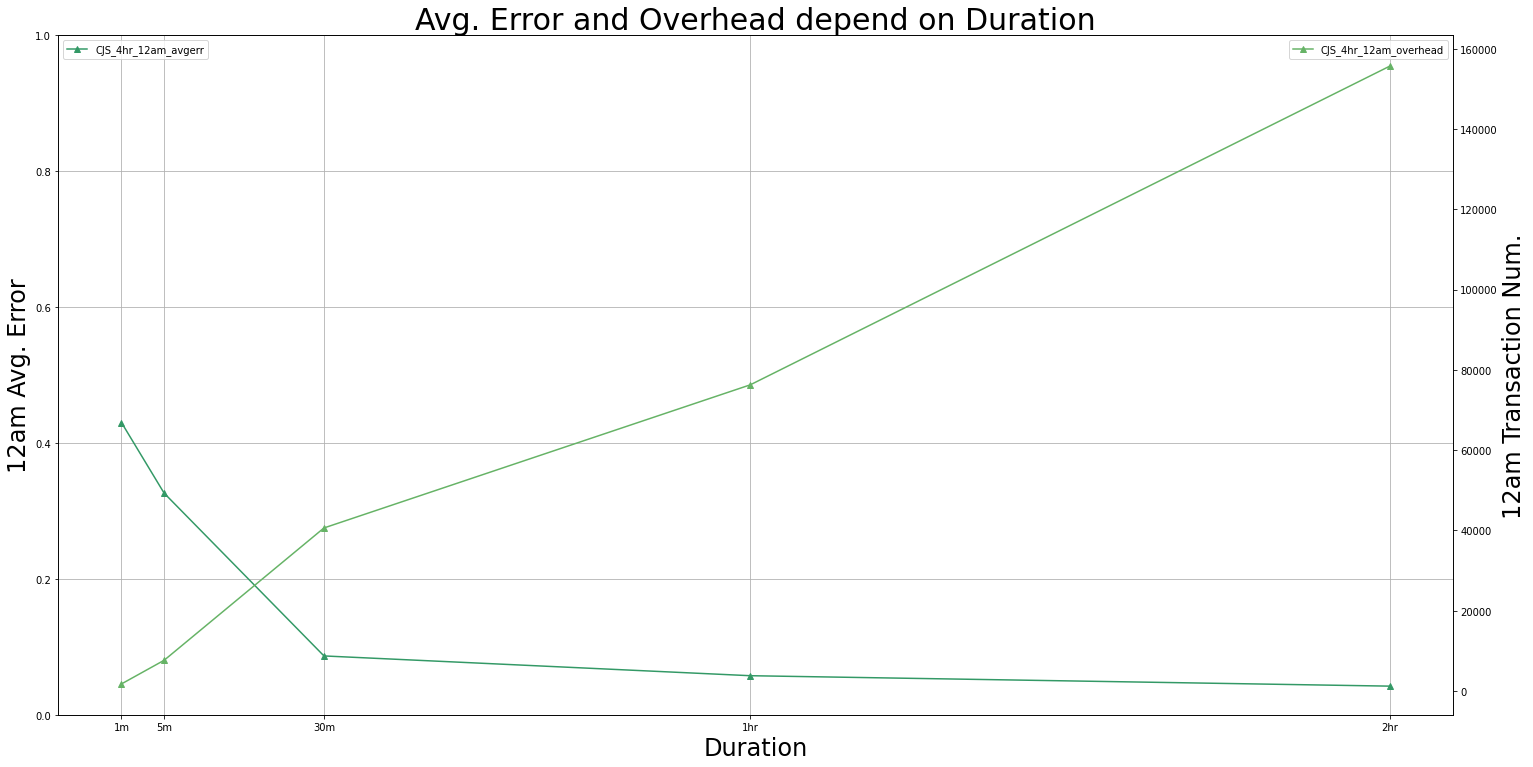

In [7]:
fig = plt.figure(figsize=(25, 12.5))
ax1 = plt.axes()

# fig, ax1 = plt.subplots()
color_idx = np.linspace(0, 1, 6) 
x_axis = [1, 5, 20, 60, 120]

# Comments out for different Capturing Interval

# ax.plot3D(new_x_axis, avg_2hr_err_plot, zs = 2, zdir='y', c=plt.cm.summer(color_idx[0]), label='CJS_2hr_12am', marker='o', linestyle='-')
ax1.plot(x_axis, avg_4hr_err_plot, c=plt.cm.summer(color_idx[1]), label='CJS_4hr_12am_avgerr', marker='^', linestyle='-')
# ax.plot3D(new_x_axis, avg_8hr_err_plot, zs = 8, zdir='y', c=plt.cm.summer(color_idx[2]), label='CJS_8hr_12am', marker='*', linestyle='-')
# ax.plot3D(new_x_axis, avg_24hr_err_plot, zs = 24, zdir='y', c=plt.cm.summer(color_idx[3]), label='CJS_24hr_12am', marker='X', linestyle='-')

ax2 = ax1.twinx()

# ax.plot3D(x_axis, transaction_avg_12am[0], zs = 2, zdir='y', c=plt.cm.summer(color_idx[0]), label='CJS_2hr_12am', marker='o', linestyle='-')
ax2.plot(x_axis, transaction_avg_12am[1], c=plt.cm.summer(color_idx[2]), label='CJS_4hr_12am_overhead', marker='^', linestyle='-')
# ax.plot3D(x_axis, transaction_avg_12am[2], zs = 8, zdir='y', c=plt.cm.summer(color_idx[2]), label='CJS_8hr_12am', marker='*', linestyle='-')
# ax.plot3D(x_axis, transaction_avg_12am[3], zs = 24, zdir='y', c=plt.cm.summer(color_idx[3]), label='CJS_24hr_12am', marker='X', linestyle='-')

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.set_xlabel('Duration', fontsize=24)
ax1.set_xticks([1, 5, 20, 60, 120])
label_x = ['1m', '5m', '30m', '1hr', '2hr']
ax1.set_xticklabels(label_x)
ax1.set_ylabel('12am Avg. Error', fontsize=24)
ax1.set_ylim(0, 1)
ax2.set_ylabel('12am Transaction Num.', fontsize=24)

ax1.grid(True)
plt.savefig('12am Avg. Error x Transaction Number.png')
plt.title("Avg. Error and Overhead depend on Duration", size=30)
plt.show()

7.5

7.6